In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class MnistNet(nn.Module):
    """
    Liteweight network architecture for the Mnist dataset (digit) classification
    """
    def __init__(self):
        super(MnistNet, self).__init__()
        self.num_classes = 10
        
        # fully convolutional part
        self.features = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(4, 4, kernel_size=5),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True)            
        )
        
        # classifier, FC layers
        self.classifier = nn.Sequential(
            nn.Linear(16*4,16),
            nn.ReLU(inplace=True),
            nn.Linear(16,self.num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x.view(-1,x.size(-3)*x.size(-2)*x.size(-1)))
        return x


def train(model, train_loader, optimizer):
    """
    Training of an epoch
    model: network
    train_loader: train_loader loading images and labels in batches
    optimizer: optimizer to use in the training
    """
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # zero the accumulated gradients
        output = model(data) # computer network's output
        loss = F.cross_entropy(output, target) # computer the loss
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        total_loss = total_loss + loss.item()
        
        if batch_idx % 100 == 0:
            print('[{}/{} ({:.0f}%)]\tBatch loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()/len(data)))
    
    print('Training: Epoch average loss {:.6f}'.format(total_loss/len(train_loader.dataset)))
         
        
def test(model, val_loader):
    """
    Compute accuracy on the validation set
    model: network
    val_loader: test_loader loading images and labels in batches
    """
    model.eval()
    
    # implement validation procedure, report accuracy on the validation set
    
    val_total = val_correct = total_loss = 0
    for batch_idx, (data, target) in enumerate(val_loader):
        out = model(data)
        loss = F.cross_entropy(out, target)
        total_loss += loss.item() * data.size(0)
        scores, predictions = torch.max(out.data, 1)
        val_total += target.size(0)
        val_correct +=int(sum((1 for predict, value in zip(predictions, target) if predict == value)))
        acc = (val_correct / val_total) * 100
        print('[{}/{} ({:.0f}%)]\tBatch loss: {:.6f} \t Accuracy: {:.6f}'.format(
                batch_idx * len(data), len(val_loader.dataset),
                100. * batch_idx / len(val_loader), loss.item()/len(data), acc))
        print('Test: Epoch average loss {:.6f} \t Accuracy: {:.6f}%'.format(total_loss/len(val_loader.dataset), (val_correct / val_total) * 100 ))

Extracting vs3ex1data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to vs3ex1data/mnist_data/MNIST/raw


Extracting vs3ex1data/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to vs3ex1data/mnist_data/MNIST/raw


Extracting vs3ex1data/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to vs3ex1data/mnist_data/MNIST/raw




Extracting vs3ex1data/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to vs3ex1data/mnist_data/MNIST/raw
Processing...
Done!
Sample images




/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


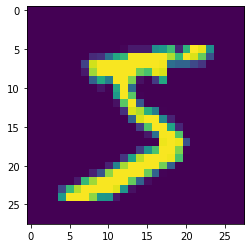

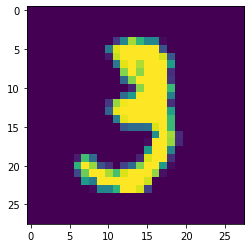

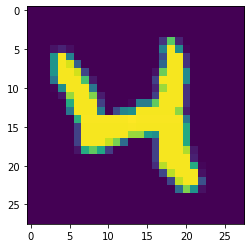

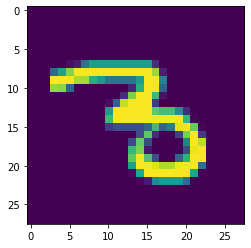

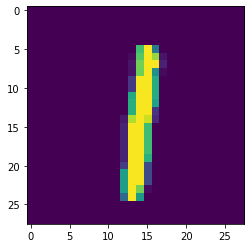

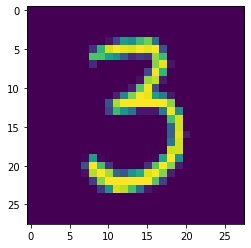

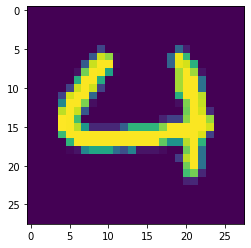

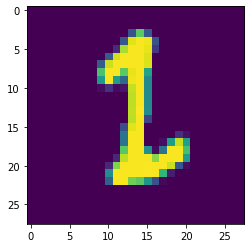

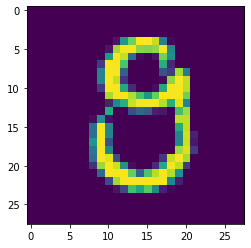

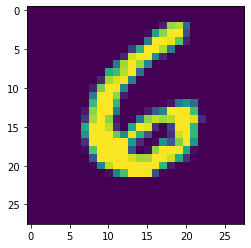

In [6]:
# mnist dataset structure - train part
mnist_dataset_train = datasets.MNIST('vs3ex1data/mnist_data', train=True, download=True, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))
# mnist dataset structure - test part
mnist_dataset_val = datasets.MNIST('vs3ex1data/mnist_data', train=False, download=True, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))

# show sample images
print('Sample images')
for i in range(0,100,10):
    plt.imshow(Image.fromarray(mnist_dataset_train.train_data[i].numpy(), mode='L'))
    plt.show()

In [7]:
# loader of the training set
train_loader = torch.utils.data.DataLoader(mnist_dataset_train,batch_size=16, shuffle=True)
# loader of the validation set
val_loader = torch.utils.data.DataLoader(mnist_dataset_val,batch_size=512, shuffle=False)

model = MnistNet() # initialize network structure
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20 + 1):
        print('Epoch {}'.format(epoch))
        train(model, train_loader, optimizer)
        test(model, val_loader)


Epoch 1
[0/60000 (0%)]	Batch loss: 0.145991
[1600/60000 (3%)]	Batch loss: 0.124527
[3200/60000 (5%)]	Batch loss: 0.066799
[4800/60000 (8%)]	Batch loss: 0.010113
[6400/60000 (11%)]	Batch loss: 0.063687
[8000/60000 (13%)]	Batch loss: 0.019528
[9600/60000 (16%)]	Batch loss: 0.026658
[11200/60000 (19%)]	Batch loss: 0.005639
[12800/60000 (21%)]	Batch loss: 0.008553
[14400/60000 (24%)]	Batch loss: 0.022977
[16000/60000 (27%)]	Batch loss: 0.008801
[17600/60000 (29%)]	Batch loss: 0.018346
[19200/60000 (32%)]	Batch loss: 0.015504
[20800/60000 (35%)]	Batch loss: 0.000457
[22400/60000 (37%)]	Batch loss: 0.032755
[24000/60000 (40%)]	Batch loss: 0.031489
[25600/60000 (43%)]	Batch loss: 0.001381
[27200/60000 (45%)]	Batch loss: 0.052425
[28800/60000 (48%)]	Batch loss: 0.000554
[30400/60000 (51%)]	Batch loss: 0.019915
[32000/60000 (53%)]	Batch loss: 0.001596
[33600/60000 (56%)]	Batch loss: 0.002728
[35200/60000 (59%)]	Batch loss: 0.009869
[36800/60000 (61%)]	Batch loss: 0.012737
[38400/60000 (64%)]	Ba

[11200/60000 (19%)]	Batch loss: 0.047496
[12800/60000 (21%)]	Batch loss: 0.007544
[14400/60000 (24%)]	Batch loss: 0.021632
[16000/60000 (27%)]	Batch loss: 0.034212
[17600/60000 (29%)]	Batch loss: 0.006560
[19200/60000 (32%)]	Batch loss: 0.004940
[20800/60000 (35%)]	Batch loss: 0.045600
[22400/60000 (37%)]	Batch loss: 0.023173
[24000/60000 (40%)]	Batch loss: 0.004704
[25600/60000 (43%)]	Batch loss: 0.050014
[27200/60000 (45%)]	Batch loss: 0.001102
[28800/60000 (48%)]	Batch loss: 0.000477
[30400/60000 (51%)]	Batch loss: 0.023781
[32000/60000 (53%)]	Batch loss: 0.000949
[33600/60000 (56%)]	Batch loss: 0.000654
[35200/60000 (59%)]	Batch loss: 0.005563
[36800/60000 (61%)]	Batch loss: 0.001487
[38400/60000 (64%)]	Batch loss: 0.000253
[40000/60000 (67%)]	Batch loss: 0.000581
[41600/60000 (69%)]	Batch loss: 0.001321
[43200/60000 (72%)]	Batch loss: 0.001382
[44800/60000 (75%)]	Batch loss: 0.000341
[46400/60000 (77%)]	Batch loss: 0.000322
[48000/60000 (80%)]	Batch loss: 0.004408
[49600/60000 (83

[22400/60000 (37%)]	Batch loss: 0.006252
[24000/60000 (40%)]	Batch loss: 0.018044
[25600/60000 (43%)]	Batch loss: 0.002593
[27200/60000 (45%)]	Batch loss: 0.000969
[28800/60000 (48%)]	Batch loss: 0.015348
[30400/60000 (51%)]	Batch loss: 0.006809
[32000/60000 (53%)]	Batch loss: 0.000691
[33600/60000 (56%)]	Batch loss: 0.000194
[35200/60000 (59%)]	Batch loss: 0.010036
[36800/60000 (61%)]	Batch loss: 0.002604
[38400/60000 (64%)]	Batch loss: 0.014936
[40000/60000 (67%)]	Batch loss: 0.013206
[41600/60000 (69%)]	Batch loss: 0.015948
[43200/60000 (72%)]	Batch loss: 0.001189
[44800/60000 (75%)]	Batch loss: 0.001078
[46400/60000 (77%)]	Batch loss: 0.000836
[48000/60000 (80%)]	Batch loss: 0.002390
[49600/60000 (83%)]	Batch loss: 0.006173
[51200/60000 (85%)]	Batch loss: 0.001166
[52800/60000 (88%)]	Batch loss: 0.004780
[54400/60000 (91%)]	Batch loss: 0.000119
[56000/60000 (93%)]	Batch loss: 0.007137
[57600/60000 (96%)]	Batch loss: 0.007633
[59200/60000 (99%)]	Batch loss: 0.005631
Training: Epoch 

[33600/60000 (56%)]	Batch loss: 0.017138
[35200/60000 (59%)]	Batch loss: 0.005479
[36800/60000 (61%)]	Batch loss: 0.002080
[38400/60000 (64%)]	Batch loss: 0.000147
[40000/60000 (67%)]	Batch loss: 0.007913
[41600/60000 (69%)]	Batch loss: 0.011912
[43200/60000 (72%)]	Batch loss: 0.002057
[44800/60000 (75%)]	Batch loss: 0.000815
[46400/60000 (77%)]	Batch loss: 0.000727
[48000/60000 (80%)]	Batch loss: 0.034047
[49600/60000 (83%)]	Batch loss: 0.001274
[51200/60000 (85%)]	Batch loss: 0.003789
[52800/60000 (88%)]	Batch loss: 0.000574
[54400/60000 (91%)]	Batch loss: 0.003342
[56000/60000 (93%)]	Batch loss: 0.018987
[57600/60000 (96%)]	Batch loss: 0.000588
[59200/60000 (99%)]	Batch loss: 0.002767
Training: Epoch average loss 0.008485
[0/10000 (0%)]	Batch loss: 0.000232 	 Accuracy: 95.507812
Test: Epoch average loss 0.006094 	 Accuracy: 95.507812%
[512/10000 (5%)]	Batch loss: 0.000292 	 Accuracy: 95.507812
Test: Epoch average loss 0.013741 	 Accuracy: 95.507812%
[1024/10000 (10%)]	Batch loss: 0.

[44800/60000 (75%)]	Batch loss: 0.001926
[46400/60000 (77%)]	Batch loss: 0.027553
[48000/60000 (80%)]	Batch loss: 0.010603
[49600/60000 (83%)]	Batch loss: 0.016487
[51200/60000 (85%)]	Batch loss: 0.021323
[52800/60000 (88%)]	Batch loss: 0.000168
[54400/60000 (91%)]	Batch loss: 0.000236
[56000/60000 (93%)]	Batch loss: 0.001108
[57600/60000 (96%)]	Batch loss: 0.001664
[59200/60000 (99%)]	Batch loss: 0.002751
Training: Epoch average loss 0.008118
[0/10000 (0%)]	Batch loss: 0.000243 	 Accuracy: 96.289062
Test: Epoch average loss 0.006367 	 Accuracy: 96.289062%
[512/10000 (5%)]	Batch loss: 0.000306 	 Accuracy: 96.191406
Test: Epoch average loss 0.014395 	 Accuracy: 96.191406%
[1024/10000 (10%)]	Batch loss: 0.000372 	 Accuracy: 95.833333
Test: Epoch average loss 0.024149 	 Accuracy: 95.833333%
[1536/10000 (15%)]	Batch loss: 0.000335 	 Accuracy: 95.556641
Test: Epoch average loss 0.032937 	 Accuracy: 95.556641%
[2048/10000 (20%)]	Batch loss: 0.000337 	 Accuracy: 95.390625
Test: Epoch average 

[56000/60000 (93%)]	Batch loss: 0.023532
[57600/60000 (96%)]	Batch loss: 0.002485
[59200/60000 (99%)]	Batch loss: 0.015521
Training: Epoch average loss 0.008145
[0/10000 (0%)]	Batch loss: 0.000296 	 Accuracy: 95.312500
Test: Epoch average loss 0.007753 	 Accuracy: 95.312500%
[512/10000 (5%)]	Batch loss: 0.000367 	 Accuracy: 94.824219
Test: Epoch average loss 0.017383 	 Accuracy: 94.824219%
[1024/10000 (10%)]	Batch loss: 0.000520 	 Accuracy: 94.205729
Test: Epoch average loss 0.031019 	 Accuracy: 94.205729%
[1536/10000 (15%)]	Batch loss: 0.000422 	 Accuracy: 94.189453
Test: Epoch average loss 0.042089 	 Accuracy: 94.189453%
[2048/10000 (20%)]	Batch loss: 0.000340 	 Accuracy: 94.257812
Test: Epoch average loss 0.051010 	 Accuracy: 94.257812%
[2560/10000 (25%)]	Batch loss: 0.000327 	 Accuracy: 94.270833
Test: Epoch average loss 0.059570 	 Accuracy: 94.270833%
[3072/10000 (30%)]	Batch loss: 0.000379 	 Accuracy: 94.280134
Test: Epoch average loss 0.069509 	 Accuracy: 94.280134%
[3584/10000 

[1024/10000 (10%)]	Batch loss: 0.000450 	 Accuracy: 96.223958
Test: Epoch average loss 0.028635 	 Accuracy: 96.223958%
[1536/10000 (15%)]	Batch loss: 0.000432 	 Accuracy: 95.898438
Test: Epoch average loss 0.039960 	 Accuracy: 95.898438%
[2048/10000 (20%)]	Batch loss: 0.000303 	 Accuracy: 95.820312
Test: Epoch average loss 0.047894 	 Accuracy: 95.820312%
[2560/10000 (25%)]	Batch loss: 0.000304 	 Accuracy: 95.768229
Test: Epoch average loss 0.055860 	 Accuracy: 95.768229%
[3072/10000 (30%)]	Batch loss: 0.000366 	 Accuracy: 95.898438
Test: Epoch average loss 0.065446 	 Accuracy: 95.898438%
[3584/10000 (35%)]	Batch loss: 0.000240 	 Accuracy: 95.922852
Test: Epoch average loss 0.071731 	 Accuracy: 95.922852%
[4096/10000 (40%)]	Batch loss: 0.000406 	 Accuracy: 95.876736
Test: Epoch average loss 0.082366 	 Accuracy: 95.876736%
[4608/10000 (45%)]	Batch loss: 0.000304 	 Accuracy: 96.015625
Test: Epoch average loss 0.090332 	 Accuracy: 96.015625%
[5120/10000 (50%)]	Batch loss: 0.000039 	 Accura

[2560/10000 (25%)]	Batch loss: 0.000296 	 Accuracy: 95.377604
Test: Epoch average loss 0.052483 	 Accuracy: 95.377604%
[3072/10000 (30%)]	Batch loss: 0.000300 	 Accuracy: 95.424107
Test: Epoch average loss 0.060339 	 Accuracy: 95.424107%
[3584/10000 (35%)]	Batch loss: 0.000277 	 Accuracy: 95.458984
Test: Epoch average loss 0.067600 	 Accuracy: 95.458984%
[4096/10000 (40%)]	Batch loss: 0.000394 	 Accuracy: 95.464410
Test: Epoch average loss 0.077930 	 Accuracy: 95.464410%
[4608/10000 (45%)]	Batch loss: 0.000264 	 Accuracy: 95.527344
Test: Epoch average loss 0.084862 	 Accuracy: 95.527344%
[5120/10000 (50%)]	Batch loss: 0.000040 	 Accuracy: 95.862926
Test: Epoch average loss 0.085920 	 Accuracy: 95.862926%
[5632/10000 (55%)]	Batch loss: 0.000118 	 Accuracy: 96.028646
Test: Epoch average loss 0.089021 	 Accuracy: 96.028646%
[6144/10000 (60%)]	Batch loss: 0.000229 	 Accuracy: 96.108774
Test: Epoch average loss 0.095021 	 Accuracy: 96.108774%
[6656/10000 (65%)]	Batch loss: 0.000055 	 Accura

[4096/10000 (40%)]	Batch loss: 0.000483 	 Accuracy: 93.684896
Test: Epoch average loss 0.107753 	 Accuracy: 93.684896%
[4608/10000 (45%)]	Batch loss: 0.000294 	 Accuracy: 93.886719
Test: Epoch average loss 0.115455 	 Accuracy: 93.886719%
[5120/10000 (50%)]	Batch loss: 0.000106 	 Accuracy: 94.318182
Test: Epoch average loss 0.118236 	 Accuracy: 94.318182%
[5632/10000 (55%)]	Batch loss: 0.000300 	 Accuracy: 94.368490
Test: Epoch average loss 0.126096 	 Accuracy: 94.368490%
[6144/10000 (60%)]	Batch loss: 0.000225 	 Accuracy: 94.606370
Test: Epoch average loss 0.132008 	 Accuracy: 94.606370%
[6656/10000 (65%)]	Batch loss: 0.000196 	 Accuracy: 94.796317
Test: Epoch average loss 0.137147 	 Accuracy: 94.796317%
[7168/10000 (70%)]	Batch loss: 0.000131 	 Accuracy: 95.026042
Test: Epoch average loss 0.140589 	 Accuracy: 95.026042%
[7680/10000 (75%)]	Batch loss: 0.000386 	 Accuracy: 94.982910
Test: Epoch average loss 0.150709 	 Accuracy: 94.982910%
[8192/10000 (80%)]	Batch loss: 0.000233 	 Accura

[5632/10000 (55%)]	Batch loss: 0.000137 	 Accuracy: 96.370443
Test: Epoch average loss 0.084260 	 Accuracy: 96.370443%
[6144/10000 (60%)]	Batch loss: 0.000351 	 Accuracy: 96.304087
Test: Epoch average loss 0.093461 	 Accuracy: 96.304087%
[6656/10000 (65%)]	Batch loss: 0.000095 	 Accuracy: 96.484375
Test: Epoch average loss 0.095958 	 Accuracy: 96.484375%
[7168/10000 (70%)]	Batch loss: 0.000108 	 Accuracy: 96.640625
Test: Epoch average loss 0.098799 	 Accuracy: 96.640625%
[7680/10000 (75%)]	Batch loss: 0.000298 	 Accuracy: 96.606445
Test: Epoch average loss 0.106612 	 Accuracy: 96.606445%
[8192/10000 (80%)]	Batch loss: 0.000112 	 Accuracy: 96.702665
Test: Epoch average loss 0.109535 	 Accuracy: 96.702665%
[8704/10000 (85%)]	Batch loss: 0.000085 	 Accuracy: 96.820747
Test: Epoch average loss 0.111752 	 Accuracy: 96.820747%
[9216/10000 (90%)]	Batch loss: 0.000130 	 Accuracy: 96.875000
Test: Epoch average loss 0.115160 	 Accuracy: 96.875000%
[5168/10000 (95%)]	Batch loss: 0.000631 	 Accura